# <center> PPOL 564 | Data Science I: Foundations <br><br> Assignment 2  </center>

Please enter your `name` and `netid` in the respective objects as strings. 

In [90]:
name = "Allen Church"
netid = "ac524"

## Instructions

The following checkpoint assignment seeks to reinforce your knowledge of materials covered up to this point in the course. This assignment should be completed independently or with your randomly assigned partner (see Course Policies "Homework Partner" in the Syllabus). 

Recall that all assignment submissions must adhere to the following guidelines: 

- (i) all code must run; 
- (ii) solutions should be readable
    + Code should be thoroughly commented (the Professor/TA should be able to understand the code's purpose by reading the comment),
    + Coding solutions should be broken up into individual code chunks in Jupyter notebooks, not clumped together into one large code chunk,
    + Each student defined function must contain a doc string explaining what the function does, each input argument, and what the function returns;
- (iii) Commentary, responses, and/or written solutions should all be written in Markdown and should contain no grammatical or spelling errors;
- (iv) All mathematical formulas should be written in LaTex;

There are a total of **_13 points_** available for this assignment.

## Data

In this assignment, we'll explore data maintained by the **_Drug Enforcement Administration_** that tracks the path of every single pain pill sold in the United States by manufacturers and distributors to pharmacies in every town and city. The data was downloaded from the **_Washington Post's_** arcos repository, which extracted and cleaned all transactions related to the distribution of oxycodone and hydrocodone pills. The post made this data available at the state and county level and [reported on it in July 2019](https://www.washingtonpost.com/graphics/2019/investigations/dea-pain-pill-database/). The data accompanying the assignment has been subsetted to _only include transactions that took place between Washington DC pharmacies_. Please import and use these data to answer the following questions. Examine the data closely to understand how it's put together. All questions are answerable given the provided data.   

## Submitting Assignment

Please submit a completed version of your Jupyter notebook (`.ipynb`) via CANVAS. The notebook should be renames as `<netID>_<last-name>_assignment_02.ipynb`. Please consult CANVAS for the required due date.

# Questions

## Importing necessary packages

In [91]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

## Importing as dataframe and viewing data

In [92]:
df = pd.read_csv('arcos-dc.csv')

df.head()

,reporter_dea_no,reporter_bus_act,reporter_name,reporter_addl_co_info,reporter_address1,reporter_address2,reporter_city,reporter_state,reporter_zip,reporter_county,...,n_pills,transaction_id,product_name,ingredient_name,measure,mme_conversion_factor,manufacturer,revised_company_name,reporter_family,dosage_strength
0,PB0034861,DISTRIBUTOR,BELLCO DRUG CORP,NaN,5500 NEW HORIZONS BLVD,NaN,NORTH AMITYVILLE,NY,11701,SUFFOLK,...,1200.0,1761,ENDOCET - 7.5MG OXYCODONE.HCL/325MG,OXYCODONE HYDROCHLORIDE,TAB,1.5,Par Pharmaceutical,"Endo Pharmaceuticals, Inc.",Bellco Drug Corp,7.5
1,PB0034861,DISTRIBUTOR,BELLCO DRUG CORP,NaN,5500 NEW HORIZONS BLVD,NaN,NORTH AMITYVILLE,NY,11701,SUFFOLK,...,1200.0,6368,ENDOCET - 7.5MG OXYCODONE.HCL/325MG,OXYCODONE HYDROCHLORIDE,TAB,1.5,Par Pharmaceutical,"Endo Pharmaceuticals, Inc.",Bellco Drug Corp,7.5
2,PB0034861,DISTRIBUTOR,BELLCO DRUG CORP,NaN,5500 NEW HORIZONS BLVD,NaN,NORTH AMITYVILLE,NY,11701,SUFFOLK,...,300.0,7756,HYDROCODONE BIT./IBUPROFEN;7.5MG & 2,HYDROCODONE BITARTRATE HEMIPENTAHYDRATE,TAB,1.0,"Teva Pharmaceuticals USA, Inc.",Teva,Bellco Drug Corp,7.5
3,PB0034861,DISTRIBUTOR,BELLCO DRUG CORP,NaN,5500 NEW HORIZONS BLVD,NaN,NORTH AMITYVILLE,NY,11701,SUFFOLK,...,500.0,6947,HYDROCODO.BIT 10MG&AC USP TAB,HYDROCODONE BITARTRATE HEMIPENTAHYDRATE,TAB,1.0,SpecGx LLC,Mallinckrodt,Bellco Drug Corp,10.0
4,PB0034861,DISTRIBUTOR,BELLCO DRUG CORP,NaN,5500 NEW HORIZONS BLVD,NaN,NORTH AMITYVILLE,NY,11701,SUFFOLK,...,800.0,3603,OXYCODONE HYDROCHLORIDE CR 20MG TABL,OXYCODONE HYDROCHLORIDE,TAB,1.5,"Actavis Pharma, Inc.",Purdue Pharma LP,Bellco Drug Corp,20.0


#### 1. What is the unit of observation?
The unit of observation in the CSV file is opioid transactions between Washington, DC pharmacies.

<font color = "darkred">
Point(s) = 1
</font>

#### 2. What is the spatial and temporal coverage of the data?

## Spatial coverage for buyers by state

In [93]:
df.buyer_state.unique()

array(['DC'], dtype=object)

## Spatial coverage for buyers by zip code

In [94]:
df.buyer_zip.unique()

array([20003, 20008, 20007, 20009, 20006, 20037, 20001, 20011, 20017,
       20016, 20015, 20018, 20010, 20019, 20002, 20032, 20012, 20036,
       20024, 20020, 20005, 20004, 20307, 20060, 20505, 20522, 20422,
       20593])

## Spatial coverage for distributers

In [95]:
df.reporter_state.unique()

array(['NY', 'MD', 'TN', 'DC', 'PA', 'MI', 'MS', 'NJ', 'FL', 'SC', 'OH',
       'VA', 'WV', 'KY', 'IL', 'IN', 'WI', 'CT', 'MA', 'TX', 'CA', 'MO',
       'KS', 'WA', 'NV', 'AZ', 'CO', 'AL'], dtype=object)

## Temporal coverage of data

In [96]:
min_year = df.transaction_date.min()
max_year = df.transaction_date.max()

print("The first date is " + str(min_year) + " and the last date is " + str(max_year) + ".")

The first date is 2006-01-03 and the last date is 2012-12-31.


<font color = "darkred">
Point(s) = 2
</font>

#### 3. For each of the variables reported in the raw data, what is the proportion of missing entries? 

## 3a. List all variables that are missing more than 1% of entries

Find missing values in df by subsetting original to df_missing and use boolean indexing. In this case, True indicates a *missing* value.

Print the head of df_missing to examine missing fields.

In [97]:
df_missing = df.isna()
df_missing.head()

,reporter_dea_no,reporter_bus_act,reporter_name,reporter_addl_co_info,reporter_address1,reporter_address2,reporter_city,reporter_state,reporter_zip,reporter_county,...,n_pills,transaction_id,product_name,ingredient_name,measure,mme_conversion_factor,manufacturer,revised_company_name,reporter_family,dosage_strength
0,False,False,False,True,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,True,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,True,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,True,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Below, we sum df_missing column-wise to generate a total of missing elements per column.

In [98]:
df_missing.sum()

reporter_dea_no               0
reporter_bus_act              0
reporter_name                 0
reporter_addl_co_info    122919
reporter_address1             0
reporter_address2         95708
reporter_city                 0
reporter_state                0
reporter_zip                  0
reporter_county               0
buyer_dea_no                  0
buyer_bus_act                 0
buyer_name                    0
buyer_addl_co_info        56559
buyer_address1                0
buyer_address2            89221
buyer_city                    0
buyer_state                   0
buyer_zip                     0
buyer_county                  0
transaction_code              0
drug_code                     0
ndc_no                        0
drug_name                     0
quantity                      0
unit                     123238
action_indicator         123143
order_form_no             54588
correction_no            123214
strength                  79953
transaction_date              0
calc_bas

Below, we create a missing series by dividing the sum of df_missing by the total number of rows, and multiplying by 100 to calculate percentage missing.

Afterwards, we create a DataFrame, name the column "percent", and filter the percent column to only display values over 0.01.

Lastly, we sort these values by the percent column, and set ascending to False in order to view values in descending order.

In [99]:
missing = df_missing.sum() * 100 / len(df_missing)
missing_percent = pd.DataFrame(missing)
missing_percent.columns = ["percent"]
missing_percent.loc[missing_percent.percent > 0.01].sort_values(by=['percent'], ascending=False)

,percent
unit,100.000000
correction_no,99.980525
action_indicator,99.922913
reporter_addl_co_info,99.741151
reporter_address2,77.661111
buyer_address2,72.397313
strength,64.876905
buyer_addl_co_info,45.894124
order_form_no,44.294779
dosage_strength,0.192311


## 3b. Why do you think these observations are missing?

According to the sorted missing observations above, the data compilers did not include any units. They included very little correction_no, action_indicator, and reporter_addl_co_info.

I believe these observations are missing because they were listed as optional responses, or were system-generated when generating the survey. If they were system-generated, it is possible they did not translate into the output file.

## 3c. Is it okay to ignore or drop these missing variables?

We can ignore/drop these missing variables, as they will detract from performing statistical analysis on the data - since Python will throw an error if it encounters non-numeric data in a column that should be entirely numeric. However, we should note to the consumer of the analysis which variables we dropped, and what percentage of overall observations were missing. 

<font color = "darkred">
Point(s) = 3
</font>

#### 4. How many distinct distributors, manufacturers, and pharmacies are there in the data?

### Distinct distributors
Below, we isolate the reporter_dea_no and specify only unique values.

In [100]:
df.reporter_dea_no.unique()

array(['PB0034861', 'PD0029567', 'PG0149650', 'RD0271130', 'RD0274011',
       'RD0311100', 'RG0131499', 'RH0236667', 'RH0302567', 'RH0344781',
       'RW0269654', 'RW0277752', 'PR0205559', 'PS0001723', 'RA0180733',
       'RA0287020', 'RA0289000', 'RM0424363', 'RO0153609', 'RP0201474',
       'RP0330097', 'RQ0188981', 'RR0236073', 'RW0294493', 'RD0204797',
       'RD0277409', 'RH0162494', 'RW0161872', 'RM0178675', 'RM0310540',
       'RM0316693', 'RN0341723', 'RP0349224', 'PG0229321', 'PP0040167',
       'RM0145347', 'RB0394940', 'RB0395219', 'RT0130182', 'RM0324804',
       'RS0142985', 'RW0276813', 'RH0238192', 'PP0236352', 'RD0274364',
       'RH0284199', 'RA0380511', 'RM0319954', 'RP0349022', 'RP0337370',
       'RT0221399', 'RB0341343', 'RP0334540', 'RP0345151', 'RS0434679',
       'RM0357841', 'RN0292970', 'RP0351736', 'RG0208581', 'RA0108034',
       'RA0186014', 'RC0282498', 'RH0181709', 'RE0160262', 'RB0326137',
       'PA0021179', 'RS0328028', 'RB0393885', 'RC0231148', 'RA02

Below, we calculate the length of unique repoter's DEA numbers.

In [101]:
print("There are " + str(len(df.reporter_dea_no.unique())) + " unique distributors.")

There are 73 unique distributors.


#### Distinct manufacturers

Below, we calculate the length of unique manufacturers.

In [102]:
print("There are " + str(len(df.manufacturer.unique())) + " unique manufacturers.")

There are 46 unique manufacturers.


#### Distinct pharmacies

Below, we calculate the length of unique pharmacies based on the buyer_name column.

In [103]:
print("There are " + str(len(df.buyer_name.unique())) + " unique pharmacies.")

There are 215 unique pharmacies.


<font color = "darkred">
Point(s) = 1
</font>

#### 5. How many pills did each distributor distribute to Washington DC by year? For each year, print of the names of the top five distributors with the total amount of pills they sold. 

### Total pills by distributor distributed to Washington, DC by year

Below, we format the transaction_date column as a Pandas date type, then we create a new column 'year'.

In [104]:
df['transaction_date'] = pd.to_datetime(df['transaction_date'])
df['year'] = df['transaction_date'].dt.year

Setting the maximum rows of display to view entire dataframe and all totals.

In [105]:
pd.set_option('display.max_rows', 227)

Below, we group by reporter_dea_no and year, and sum the n_pills column.

In [106]:
df.groupby(['reporter_dea_no', 'year'])[['n_pills']].sum()

n_pills
reporter_dea_no year           
PA0021179       2007     1500.0
PB0034861       2006   127800.0
PD0029567       2006   928040.0
                2007   993260.0
                2008  1160510.0
                2009  1133160.0
                2010  1222480.0
                2011  1678870.0
                2012   450570.0
PG0149650       2006    43500.0
                2007    25000.0
                2008    70100.0
                2009    70700.0
                2010    89600.0
                2011    61880.0
                2012    50290.0
PG0229321       2006     4900.0
                2007     8000.0
                2008     2500.0
                2009     2000.0
PP0040167       2006     6400.0
                2009      120.0
PP0236352       2006      100.0
                2007      200.0
                2011      100.0
                2012      200.0
PR0205559       2006   770260.0
                2007   888500.0
                2008   962900.0
                2009   974100.0
                2010   999600.0
                2011  1068300.0
                2012  1042900.0
PS0001723       2011    38600.0
                2012    37180.0
RA0108034       2006       30.0
                2007      500.0
RA0109581       2006      400.0
RA0180733       2006   125000.0
                2007   964700.0
                2008    73200.0
                2009    79600.0
                2010    74700.0
                2011    43900.0
                2012    57300.0
RA0186014       2012     1500.0
RA0287020       2006   118500.0
                2007   198500.0
                2008   109300.0
                2009    76000.0
                2010    53200.0
                2011    29500.0
                2012    25500.0
RA0289000       2006  1448080.0
                2007  1643280.0
                2008  1687440.0
                2009  1744040.0
                2010  1779660.0
                2011  1340220.0
                2012   762880.0
RA0290736       2012      400.0
RA0380511       2009     3000.0
RB0326137       2006      200.0
                2007      100.0
RB0341343       2007      120.0
                2009       30.0
                2010       30.0
                2011       60.0
                2012      560.0
RB0393885       2010      400.0
RB0394940       2010     3000.0
                2011     1000.0
                2012     3500.0
RB0395219       2010      600.0
                2011     3000.0
RC0231148       2012       20.0
RC0282498       2011    18400.0
RD0204797       2009    23200.0
                2010     3600.0
RD0271130       2006    10200.0
                2007     4300.0
                2008     6100.0
                2009     4600.0
                2010     7300.0
                2011    10200.0
                2012     5100.0
RD0274011       2006   120000.0
                2007   118000.0
                2008   150000.0
                2009   150000.0
                2010    85400.0
                2011    15400.0
                2012    27300.0
RD0274364       2006     2750.0
                2009     3600.0
                2012     2240.0
RD0277409       2006     1200.0
                2007     1000.0
                2008     4600.0
                2009     3500.0
                2010    11900.0
                2011     3000.0
RD0311100       2008     8370.0
                2009     1710.0
RE0160262       2007        5.0
RG0131499       2006     2900.0
                2007     5900.0
                2008     4400.0
                2009    12210.0
                2010     4430.0
RG0208581       2011     1000.0
                2012      600.0
RH0162494       2006     1000.0
                2007     1200.0
                2008      700.0
                2009     2200.0
                2010      460.0
                2011      300.0
RH0181709       2010     1000.0
RH0236667       2006    34300.0
                2007    30400.0
                2008    36300.0
                2009    35500.0
                2010    

### 2006: Top five distributors with the total amount of pills sold.

We create a unique dataframe with only observations from the year we are interested in. Next, we group by reporter_dea_no and year (for viewing purposes), and take the sum of n_pills. Lastly, we use the Pandas nlargest function to display the 5 largest observations of the n_pills column.

In [107]:
df_06 = df.loc[df.year == 2006]
df_06 = df_06.groupby(['reporter_dea_no', 'year'])[['n_pills']].sum()
df_06.nlargest(5, 'n_pills')

,,n_pills
reporter_dea_no,year,
RW0269654,2006,2729430.0
RA0289000,2006,1448080.0
PD0029567,2006,928040.0
PR0205559,2006,770260.0
PB0034861,2006,127800.0


### 2007: Top five distributors with the total amount of pills sold.

In [108]:
df_07 = df.loc[df.year == 2007]
df_07 = df_07.groupby(['reporter_dea_no', 'year'])[['n_pills']].sum()
df_07.nlargest(5, 'n_pills')

,,n_pills
reporter_dea_no,year,
RW0269654,2007,3240410.0
RA0289000,2007,1643280.0
PD0029567,2007,993260.0
RA0180733,2007,964700.0
PR0205559,2007,888500.0


### 2008: Top five distributors with the total amount of pills sold.

In [109]:
df_08 = df.loc[df.year == 2008]
df_08 = df_08.groupby(['reporter_dea_no', 'year'])[['n_pills']].sum()
df_08.nlargest(5, 'n_pills')

,,n_pills
reporter_dea_no,year,
RO0153609,2008,2720060.0
RA0289000,2008,1687440.0
PD0029567,2008,1160510.0
PR0205559,2008,962900.0
RW0269654,2008,470430.0


### 2009: Top five distributors with the total amount of pills sold.

In [110]:
df_09 = df.loc[df.year == 2009]
df_09 = df_09.groupby(['reporter_dea_no', 'year'])[['n_pills']].sum()
df_09.nlargest(5, 'n_pills')

,,n_pills
reporter_dea_no,year,
RW0269654,2009,3696820.0
RA0289000,2009,1744040.0
PD0029567,2009,1133160.0
PR0205559,2009,974100.0
RD0274011,2009,150000.0


### 2010: Top five distributors with the total amount of pills sold.

In [111]:
df_10 = df.loc[df.year == 2010]
df_10 = df_10.groupby(['reporter_dea_no', 'year'])[['n_pills']].sum()
df_10.nlargest(5, 'n_pills')

,,n_pills
reporter_dea_no,year,
RW0269654,2010,4251360.0
RA0289000,2010,1779660.0
PD0029567,2010,1222480.0
PR0205559,2010,999600.0
RR0236073,2010,92970.0


### 2011: Top five distributors with the total amount of pills sold.

In [112]:
df_11 = df.loc[df.year == 2011]
df_11 = df_11.groupby(['reporter_dea_no', 'year'])[['n_pills']].sum()
df_11.nlargest(5, 'n_pills')

,,n_pills
reporter_dea_no,year,
RW0269654,2011,4699140.0
PD0029567,2011,1678870.0
RA0289000,2011,1340220.0
PR0205559,2011,1068300.0
RW0294493,2011,189100.0


### 2012: Top five distributors with the total amount of pills sold.

In [113]:
df_12 = df.loc[df.year == 2012]
df_12 = df_12.groupby(['reporter_dea_no', 'year'])[['n_pills']].sum()
df_12.nlargest(5, 'n_pills')

,,n_pills
reporter_dea_no,year,
RW0269654,2012,4995260.0
RM0424363,2012,1271700.0
PR0205559,2012,1042900.0
RA0289000,2012,762880.0
PD0029567,2012,450570.0


<font color = "darkred">
Point(s) = 1
</font>

#### 6. Generate a heatmap that tracks the number of pills that flowed into DC by zip code and year.  

Below, I create a new dataframe - df_heat - that subsets the original data by year, buyer_zip, and n_pills. Then I group by year, buyer_zip and use the sum function to obtain total number of pills. Then I use a pivot table - df_pivot - to reshape the data, with n_pills as the the unit of observation, year as index, and buyer_zip as columns (for viewing).

In [114]:
df_heat = df.loc[:,['year','buyer_zip','n_pills']]

df_heat = df_heat.groupby(['year', 'buyer_zip'])[['n_pills']].sum()

df_pivot = df_heat.pivot_table('n_pills', index='year', columns='buyer_zip')

df_pivot.head()

buyer_zip,20001,20002,20003,20004,20005,20006,20007,20008,20009,20010,...,20024,20032,20036,20037,20060,20307,20422,20505,20522,20593
year,,,,,,,,,,,,,,,,,,,,,
2006,172500.0,560040.0,999500.0,34200.0,247700.0,71800.0,304630.0,131800.0,339350.0,196700.0,...,84100.0,200630.0,216900.0,465600.0,3000.0,940680.0,NaN,NaN,200.0,NaN
2007,206500.0,659900.0,962680.0,51800.0,236800.0,86000.0,332200.0,135800.0,498260.0,152690.0,...,89600.0,255400.0,238700.0,531180.0,2000.0,1102880.0,NaN,NaN,NaN,NaN
2008,192700.0,669400.0,969400.0,69500.0,239600.0,121400.0,323130.0,138400.0,445700.0,275880.0,...,102700.0,313000.0,233600.0,625930.0,NaN,1150340.0,NaN,NaN,200.0,NaN
2009,207200.0,713830.0,1039410.0,70400.0,245200.0,158830.0,359160.0,149900.0,453000.0,333300.0,...,113600.0,282800.0,226700.0,782680.0,7160.0,1123080.0,NaN,NaN,NaN,NaN
2010,305700.0,700930.0,1118330.0,69800.0,240400.0,213900.0,355400.0,180450.0,500330.0,353000.0,...,111600.0,266170.0,228300.0,877480.0,NaN,1052160.0,NaN,100.0,NaN,NaN


Lastly, I create a heatmap with the values from df_pivot to display total number of pills that flowed into DC by zip code and year.

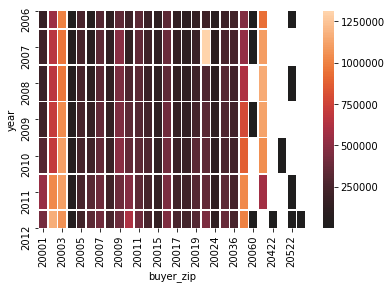

In [115]:
sns.heatmap(df_pivot,
            center=0,
            linewidths=.5)

<font color = "darkred">
Point(s) = 1
</font>

#### 7. How many pills of the strongest possible dosage strength were sold in DC?

Below, we find the maximum value within the dosage_strength column.

In [116]:
max(df.dosage_strength)

80.0

Next, we subset the dosage_strength column based on the maximum value found above. Lastly, we find the length.

In [117]:
len(df.loc[df.dosage_strength == 80])

3493

<font color = "darkred">
Point(s) = 1
</font>

#### 8. On average, which manufacturer produced the most pills (distributed in DC) of the strongest possible dosage strength?

Below, we create df_strong, which only contains dosage strengths of 80. Next, we group by manufacturer and dosage_strength (for viewing) and sum the n_pills column. Lastly, we display the largest manufacturer.

In [118]:
df_strong = df.loc[df.dosage_strength == 80]

df_strong = df_strong.groupby(['manufacturer', 'dosage_strength'])[['n_pills']].sum()

df_strong.nlargest(1, 'n_pills')

,,n_pills
manufacturer,dosage_strength,
Purdue Pharma LP,80.0,807040.0


If we expand our sorting to the top 5 manufacturers of strongest dosage strength, our analysis is more striking - showing that Purdue Pharma produces about 11 times more than the second entry.

In [119]:
df_strong.nlargest(5, 'n_pills')

,,n_pills
manufacturer,dosage_strength,
Purdue Pharma LP,80.0,807040.0
"Teva Pharmaceuticals USA, Inc.",80.0,71900.0
"Actavis Pharma, Inc.",80.0,43300.0
Par Pharmaceutical,80.0,28600.0
SpecGx LLC,80.0,12500.0


<font color = "darkred">
Point(s) = 1
</font>

#### 9. Below is population data drawn from the city of DC. Given this data, how many pills were sold per person in DC by year?

<font color = "darkred">
Point(s) = 1
</font>

In [120]:
pop_dc = [["year","pop_est"],
          [2005,568005],
          [2006,570681],
          [2007,574404],
          [2008,580236],
          [2009,592228],
          [2010,605210],
          [2011,620427],
          [2012,635040]]

Below, we convert the pop_dc list into a DataFrame, subset by third row and second column to isolate population from 2006 - 2012.

In [121]:
df_dc = pd.DataFrame(pop_dc)
df_dc = df_dc.iloc[2:, 1]
df_dc

2    570681
3    574404
4    580236
5    592228
6    605210
7    620427
8    635040
Name: 1, dtype: object

## Pills sold per person per year

Below, we divide the sum of pills sold in the year of observation by DC's population in the year of observation.

### 2006: Pills sold per person

In [122]:
df_06.n_pills.sum() / df_dc.iloc[0]

11.525931299622732

### 2007: Pills sold per person

In [123]:
df_07.n_pills.sum() / df_dc.iloc[1]

14.62925919735935

### 2008: Pills sold per person

In [124]:
df_08.n_pills.sum() / df_dc.iloc[2]

13.129243962801343

### 2009: Pills sold per person

In [125]:
df_09.n_pills.sum() / df_dc.iloc[3]

13.833776856210784

### 2010: Pills sold per person

In [126]:
df_10.n_pills.sum() / df_dc.iloc[4]

14.535285272880488

### 2011: Pills sold per person

In [127]:
df_11.n_pills.sum() / df_dc.iloc[5]

15.139686054926688

### 2012: Pills sold per person

In [128]:
df_12.n_pills.sum() / df_dc.iloc[6]

14.491512345679013

#### 10. On average, were more pain pills distributed around the holidays (i.e. November and December)?

First, we make sure the transaction_date column is still formatted as date. Next, we create a month column that uses datetime to extract only month values from the transaction_date column. Lastly, we create two new dataframes - nov_count and dec_count that sum the number of pills distributed around the holidays.

In [129]:
df['transaction_date'] = pd.to_datetime(df['transaction_date'])
df['month'] = df['transaction_date'].dt.month

df_nov = df.loc[df.month == 11]
nov_count = sum(df_nov.n_pills)

df_dec = df.loc[df.month == 12]
dec_count = sum(df_dec.n_pills)

holiday_count = round(nov_count + dec_count)
print("There were a total of " + str(holiday_count) + " pain pills distributed around the holidays.")

There were a total of 9759750 pain pills distributed around the holidays.


Below, we create df_not_holiday, where months 11-12 are excluded from observation.

In [130]:
df_not_holiday = df.loc[df.month != 12]
df_not_holiday = df.loc[df.month != 11]
not_holiday_count = sum(df_not_holiday.n_pills)
not_holiday_count = round(not_holiday_count)
print("There were a total of " + str(not_holiday_count) + " pain pills distributed during non-holiday season.")

There were a total of 53406805 pain pills distributed during non-holiday season.


<font color = "darkred">
Point(s) = 1
</font>